# Delay Airline 
XXX

-----

# 1. Business Understanding

Delayed airplanes can be a major problem for the economy of the United States for a variety of reasons. Firstly, delays can cause disruptions to the travel plans of individuals and businesses, leading to lost time and productivity. This can be especially problematic for those who rely on air travel for work or have tight schedules to adhere to.

Additionally, delays can result in additional costs for both airlines and passengers, such as the need to book new flights or pay for unexpected accommodations. These costs can add up and have a negative impact on the bottom line for both the airline industry and the economy as a whole.

Furthermore, delays can lead to decreased customer satisfaction, which can ultimately harm the reputation of the airline industry and discourage people from flying in the future. This can also have a negative impact on the economy, as the airline industry plays a significant role in the transportation sector and contributes to overall economic growth.

Overall, the issue of delayed airplanes is a complex and multifaceted problem that can have far-reaching consequences for the economy of the United States.


-----

# 2. Data Understanding

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import time

%matplotlib inline

**This data set comes from Kaggle [link](https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay?resource=download). The dataset collects about 540k flights within the USA. There are no hints, within which period of time the data was collected.**


The following columns are part of the Dataset

- **["id"]** : unique id of the row
- **["Airline"]** : commercial airline operated the flight
- **["Flight"]** :  the type of the aircraft
- **["AirportFrom"]** : from where the flight departed
- **["AirportTo"]** : the airport where the flight arrived
- **["DayofWeek"]** : which day of the week (1:Monday - 7:Sunday)
- **["Time"]** : departure time measured in minutes from midnight (in fact the range is 10-1439) [source](https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay/discussion/343573?focusReplyOnRender=true#2072803)
- **["Length"]** : duration of the flight in minutes [source](https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay/discussion/343573?focusReplyOnRender=true#2072803)
- **["Delay"]** : whether the flight was delayed or not,binary, 0:not delayed, 1:delayed


**Airline Iata Code, Number of flights and Name of Airline**
[source](https://www.kaggle.com/datasets/jimschacko/airlines-dataset-to-predict-a-delay/discussion/349138?focusReplyOnRender=true)

The IATA codes of the Airlines in this dataset are the following, according to the frequency distribution:

**WN** 94,097 - Southwest    
**DL** 60,940 - Delta    
**OO** 50,254 - Skywest    
**AA** 45,656 - American Airlines   
**MQ** 36,605 - Envoy     
**US** 34,500 - There was a US Airways Express, which now has the symbol OH, and the new name is PSA    
**XE** 31,126 - JSX   
**EV** 27,983 - ExpressJet    
**UA** 27,619 - United Airlines    
**CO** 21,118 - There was a Continental Airlines, but now it is part of United Airlines    
**FL** 20,827 - There is no code for FL in both the sites accessed    
**9E** 20,686 - Endeavor     
**B6** 18,112 - Jetblue    
**YV** 13,725 - Mesa    
**OH** 12,630 - PSA     
**AS** 11,471 - Alaska     
**F9** 6,456 - Frontier     
**HA** 5,578 - Hawaiian    

In [2]:
#Read in the input as a dataframe file in the src folder
df_flights_raw = pd.read_csv("src/Airlines.csv", index_col="id")

#All columns are written in lowercase
df_flights_raw.columns = [col.lower() for col in df_flights_raw.columns]

In [3]:
#Shape of the dataframe
df_flights_raw.shape

(539383, 8)

In [4]:
#General information of the dataset
df_flights_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539383 entries, 1 to 539383
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   airline      539383 non-null  object
 1   flight       539383 non-null  int64 
 2   airportfrom  539383 non-null  object
 3   airportto    539383 non-null  object
 4   dayofweek    539383 non-null  int64 
 5   time         539383 non-null  int64 
 6   length       539383 non-null  int64 
 7   delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 37.0+ MB


In [5]:
#Check whether we do have flights with the flight duration of 0 if so drop them
df_flights_raw[df_flights_raw["length"]==0]
print(df_flights_raw.shape)

(539383, 8)


**Summary**

In total the input data is 539383 rows and 8 columns. Each record is one flight. There are no missing values and no duplicates. To work with the data, there will be some additional features like real time, Weekends, and Lanes

------

# 3. Data Preparation

**ToDos**

A) Add a new column lane, which will use the from airport and the to airport     
B) Translated time column in datetime object with correct hour    
C) Dummy Variables for AirportFrom and AirportTo     
D) Delete rows where the duration of the flight is 0

A) Add a new Column lane, which will use the from airport and the to airport

In [6]:
df_flights_raw["lane"] = df_flights_raw["airportfrom"] + "-" + df_flights_raw["airportto"]

B) Translated Time Column in datetime object with correct time

In [7]:
#Function to translate the minutes into timestamps
def translate_time(timestamp):
    a = timestamp
    h = a // 60
    m = a % 60
    dt = time(hour=h, minute=m, second=0, microsecond=0)
    dt.isoformat(timespec='auto')
    return dt

In [8]:
df_flights_raw["starttime"] = df_flights_raw["time"].apply(translate_time)

In [9]:
df_flights_raw.head()

,airline,flight,airportfrom,airportto,dayofweek,time,length,delay,lane,starttime
id,,,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1,SFO-IAH,00:15:00
2,US,1558,PHX,CLT,3,15,222,1,PHX-CLT,00:15:00
3,AA,2400,LAX,DFW,3,20,165,1,LAX-DFW,00:20:00
4,AA,2466,SFO,DFW,3,20,195,1,SFO-DFW,00:20:00
5,AS,108,ANC,SEA,3,30,202,0,ANC-SEA,00:30:00


In [10]:
df_flights_raw["starttime"][5000]

datetime.time(10, 0)

In [11]:
df_flights_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539383 entries, 1 to 539383
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   airline      539383 non-null  object
 1   flight       539383 non-null  int64 
 2   airportfrom  539383 non-null  object
 3   airportto    539383 non-null  object
 4   dayofweek    539383 non-null  int64 
 5   time         539383 non-null  int64 
 6   length       539383 non-null  int64 
 7   delay        539383 non-null  int64 
 8   lane         539383 non-null  object
 9   starttime    539383 non-null  object
dtypes: int64(5), object(5)
memory usage: 61.4+ MB


C) Dummy Variables for AirportFrom and AirportTo

D) Delete rows where the duration of the flight is 0

In [12]:
df_flights_raw.drop(df_flights_raw[df_flights_raw["length"]==0].index, inplace = True)
print(df_flights_raw.shape)

(539379, 10)


# 4. Data Exploration

In [20]:
df_flights_clean = df_flights_raw.copy()

**Aufgabe 4:** Erstelle ein **FacetGrid**, welches ein **Histogramm** über die Dauer der Flüge pro Airline anzeigt. Dabei sollen nur drei Diagramme pro Zeile angezeigt werden.

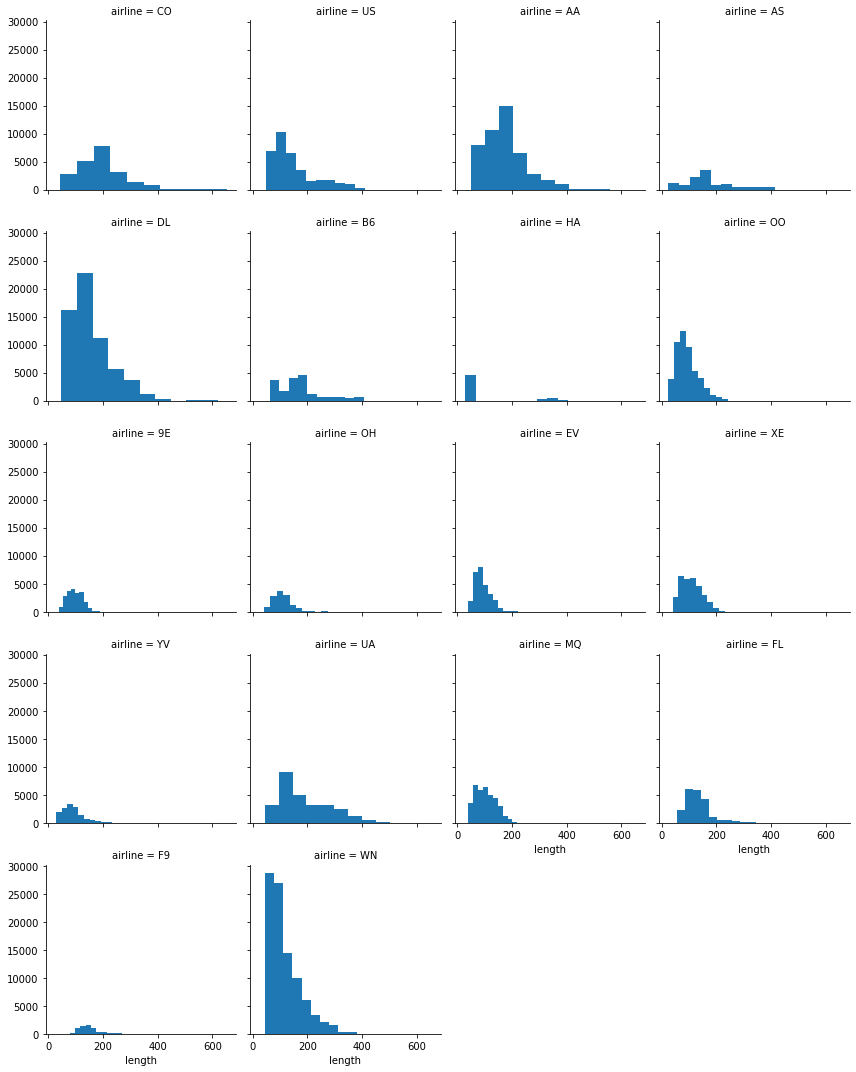

In [22]:
### LÖSUNG ###
g = sns.FacetGrid(data=df_flights_clean, col="airline", col_wrap=4)
g.map(plt.hist, "length");

# 5. Data Modelling

1. Which Airlines do have the most % delays?
1. Which lanes are mostly delayed?
1. Which flight haul types do have the most delays?

**Aufgabe 3:** Erstelle ein **Balkendiagramm**, welches die Anzahl der Flüge pro Airline zählt, absteigend sortiert und dabei zwischen verspäteten und pünktlichen Flügen unterscheidet.

## 1.  Which Airlines do have the most % delays?

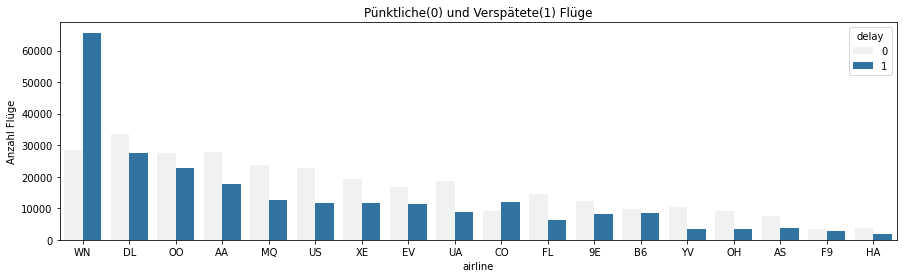

In [23]:
### LÖSUNG ###
plt.figure(figsize=(15, 4))
base_color = sns.color_palette()[0]
d = sns.countplot(
    x="airline",
    data=df_flights_clean,
    color=base_color,
    order=df_flights_clean["airline"].value_counts().index,
    hue="delay",
)
d.set_ylabel("Anzahl Flüge")
d.set_title("Pünktliche(0) und Verspätete(1) Flüge");

## 2. Which lanes are mostly delayed?

**Wir erstellen ein neues DataFrame mit dem Namen lane_df, welches die Flüge nach den Lanes gruppiert und die Werte aggregiert.**

In [24]:
"""
Hier wird ein neuer DataFrame mit dem Namen lane_df erstellt, welches die Flüge nach der 
Lane gruppiert und sowohl die Anzahl der Delays als auch die Gesamtanzahl summiert
"""
lane_df = df_flights_clean.groupby("lane").sum()
lane_df["total"] = df_flights_clean.groupby("lane").delay.count()
lane_df.drop(["flight", "dayofweek", "time", "length"], axis=1, inplace=True)
lane_df["percentage"] = np.round((lane_df.delay / lane_df.total) * 100, decimals=2)
lane_df.head()

,delay,total,percentage
lane,,,
ABE-ATL,7,31,22.58
ABE-CLT,2,31,6.45
ABE-DTW,40,85,47.06
ABE-FLL,4,17,23.53
ABE-MCO,9,31,29.03


**Aufgabe 6**: Erstelle ein **Histogramm**, welches die Verteilung der Gesamtanzahl der Flüge gruppiert nach den <code>'Lanes'</code> anzeigt.

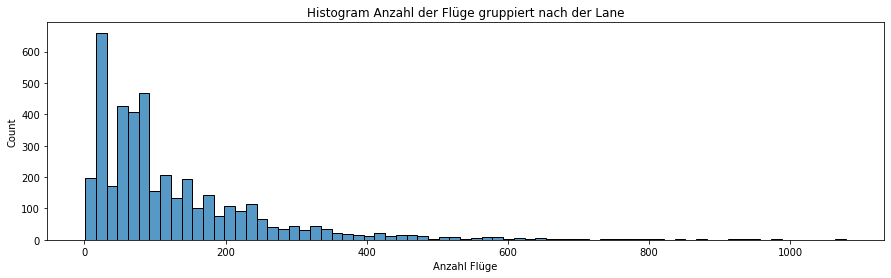

In [25]:
### LÖSUNG ###
plt.figure(figsize=(15, 4))
d = sns.histplot(lane_df["total"])
d.set_xlabel("Anzahl Flüge")
d.set_title("Histogram Anzahl der Flüge gruppiert nach der Lane");

**Aufgabe 7:** Zeige für die 20 meist geflogenen Lanes die prozentuale Verspätung. Sortiere dabei nach der Anzahl der Flüge. Schreibe die Gesamtanzahl der Flüge in ein Balkendiagramm.

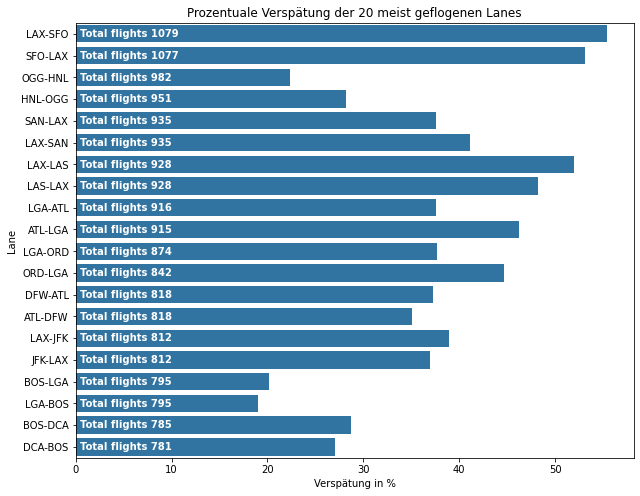

In [17]:
### LÖSUNG ###
top_20 = lane_df.sort_values(by="total", ascending=False)[:20]

plt.figure(figsize=(10, 8))
base_color = sns.color_palette()[0]
d = sns.barplot(
    y=top_20.index,
    x="percentage",
    data=top_20,
    color=base_color,
    order=top_20.index,
    orient="h",
)

locs, labels = plt.yticks()

for loc, labels in zip(locs, labels):
    total_flights = top_20.loc[labels.get_text(), "total"]

    plt.text(
        x=0.4,
        y=loc,
        s=f"Total flights {total_flights}",
        va="center",
        color="white",
        fontweight=650,
    )

d.set_ylabel("Lane")
d.set_xlabel("Verspätung in %")
d.set_title("Prozentuale Verspätung der 20 meist geflogenen Lanes");

## 3. Which flight haul types do have the most delays?

According to the IATA (International Air Transport Association) there are different categories of flight durations also called Flight haul types:

- **short-haul:** < 3 hours      
- **medium-haul:** 3 - 6 hours     
- **long-haul:** 6 - 16 hours    
- **ultra-long-haul:** > 16 hours    


In [26]:
df_flights_clean.describe()

,flight,dayofweek,time,length,delay
count,539379.000000,539379.000000,539379.00000,539379.000000,539379.000000
mean,2427.945135,3.929649,802.72950,132.202987,0.445444
std,2067.428568,1.914658,278.04601,70.116351,0.497015
min,1.000000,1.000000,10.00000,23.000000,0.000000
25%,712.000000,2.000000,565.00000,81.000000,0.000000
50%,1809.000000,4.000000,795.00000,115.000000,0.000000
75%,3745.000000,5.000000,1035.00000,162.000000,1.000000
max,7814.000000,7.000000,1439.00000,655.000000,1.000000


# 6. Results

**Ab jetzt werden wir mit einem der wohl bekanntesten Datensets arbeiten. Dem Titanitc Dataset [link](https://www.kaggle.com/competitions/titanic/data).**

In [19]:
### LÖSUNG ###
column = 'Pclass'
waffle_counts = percentage_blocks(titanic_df, column)

prev_count = 0

for cat in range(1,waffle_counts.shape[0]+1):
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat], 1)
    
    x = blocks % 10
    
    y= blocks // 10
    
    plt.bar(x=x, height=0.8, width=0.8, bottom = y)
    prev_count += waffle_counts[cat]


plt.legend(waffle_counts.index.sort_values(), bbox_to_anchor=(0.97, 0.93))
plt.axis('off')
plt.title('Wie viele % der Passagiere waren in den Klassen 1, 2, 3?')
plt.axis('square')
plt.show()


NameError: name 'percentage_blocks' is not defined